In [2]:
import random
import csv

class Student():
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url

    def __repr__(self):
        return 'Student(%r, %r, %r, %r' % (self.name, self.gender, self.data_sheet, self.image_url)

    def get_avg_grade(self):
        avg = 0
        for course in self.data_sheet.courses:
            avg += course.grade
        return avg/len(self.data_sheet.courses)


class DataSheet():
    def __init__(self, courses):
        self.courses = courses

    def get_grades_as_list(self):
        grades = []
        for course in courses:
            grades.append(course.grade)
        return grades

    def __repr__(self):
        return str(self.courses)


class Course():
    def __init__(self, name, classroom, teacher, ECTS, grade=None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ECTS = ECTS
        self.grade = grade

    def __repr__(self):
        return "{" + str(self.name) + ", " + str(self.classroom) + ", " + str(self.teacher) + ", " + str(self.ECTS) + ", " + str(self.grade) + "}"


In [3]:
#dummy data
names = ["Artem", "Asger", "Willi", "Andreas", "Martin", "Emil"]
genders = ["Male", "Female"]
course1 = Course("Math", "103", "Thomas", 10, random.randint(0,12))
course2 = Course("Danish", "105", "Thomas D", 10, random.randint(0,12))
course3 = Course("English", "107", "Thomas E", 10, random.randint(0,12))
course4 = Course("Swedish", "103", "Thomas", 10, random.randint(0,12))
course5 = Course("Litterature", "105", "Thomas D", 10, random.randint(0,12))
course6 = Course("IT", "107", "Thomas E", 10, random.randint(0,12))
courses = [course1, course2, course3]
courses1 = [course2, course6, course3]
courses2 = [course4, course5, course2]
datasheet = DataSheet(courses)
student1 = Student("Asger", "Male", datasheet, "fuck no lol")



In [36]:
def generateStudents(amount):
    students = []
    while amount > 0:
        student = (names[random.randint(0,5)], genders[random.randint(0,1)],datasheet, 'non')
        amount = amount - 1
        students.append(student)
    return students

def generateStudentsToCSV(amount):
    students = []
    while amount > 0:
            student = Student(names[random.randint(0,5)], genders[random.randint(0,1)],datasheet, 'non')
            amount = amount - 1
            students.append(student)
            
    with open('students.csv', 'w', newline='') as file:
        fieldNames = ['stud_name', 'gender', 'course_name', 'teacher', 'ects', 'classroom', 'grade', 'image_url']
        writer = csv.DictWriter(file, fieldnames=fieldNames, quoting=csv.QUOTE_NONNUMERIC)

        writer.writeheader()
        for student in students:
            for course in student.data_sheet.courses:
                writer.writerow({'stud_name' : student.name,'gender' : student.gender, 'course_name' : course.name, 'teacher' : course.teacher, 'ects' : course.ECTS, 'classroom' : course.classroom, 'grade' : course.grade, 'image_url' : student.image_url})

students = {}

with open('../students.csv', 'r') as file:
    reader = csv.reader(file)
    for row in list(reader)[1:]:
        if row[0] not in students:
            students[row[0]] = Student(row[0], row[1], DataSheet([Course(row[2], row[5], row[3], row[4], int(row[6]))]), row[7])
        else:
            students[row[0]].data_sheet.courses.append(Course(row[2], row[5], row[3], row[4], int(row[6])))

for x in students:
    student = students[x]
    print('{}, {}, {}'.format(student.name, student.image_url, student.get_avg_grade()))


Willi, non, 18.0
Andreas, non, 9.0
Martin, non, 9.0
Emil, non, 9.0


Text(0, 0.5, 'Avg Grade')

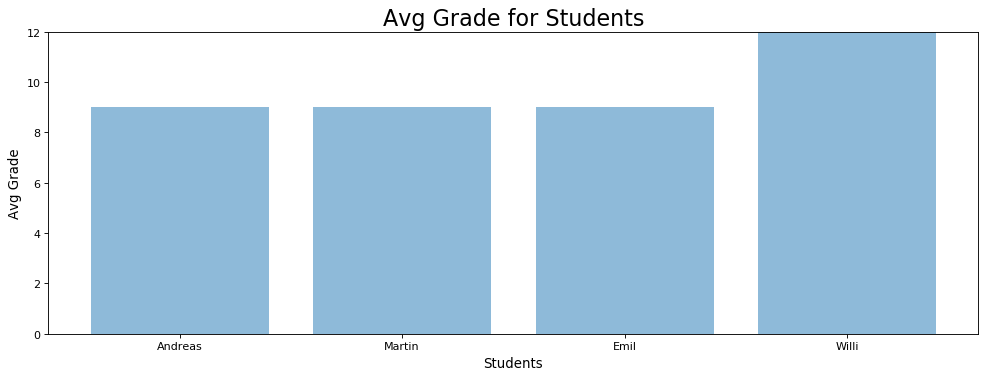

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

avgstudent = {}
for student in students:
    avgstudent[student] = students[student].get_avg_grade()

avgstudent = {k: v for k, v in sorted(avgstudent.items(), key=lambda item: item[1])}

y_bar = avgstudent.keys()
x_bar = avgstudent.values()

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='b')

plt.bar(y_bar, x_bar, align='center', alpha=0.5)

axes = plt.gca()
axes.set_ylim([0, 12])


plt.title('Avg Grade for Students', fontsize=20)

plt.xlabel("Students", fontsize=12)
plt.ylabel("Avg Grade", fontsize=12)
